In [84]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [112]:
quickTKMPIRandom = th.Thicket.from_caliperreader(glob('dataFiles/MPI/Quicksort/random/*.cali'))
quickTKMPISorted = th.Thicket.from_caliperreader(glob('dataFiles/MPI/Quicksort/sorted/cali/*.cali'))
quickTKMPIReverse = th.Thicket.from_caliperreader(glob('dataFiles/MPI/Quicksort/reverse/cali/*.cali'))
quickTKMPIPerturbed = th.Thicket.from_caliperreader(glob('dataFiles/MPI/Quicksort/perturbed/cali/*.cali'))

quickTKCUDARandom = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/QuickSort/random/cali/*.cali'))
quickTKCUDASorted = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/QuickSort/sorted/cali/*.cali'))
quickTKCUDAReverse = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/QuickSort/reverse-sorted/cali/*.cali'))
quickTKCUDAPerturbed = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/QuickSort/1%-perturbed/cali/*.cali'))

In [130]:
# quickTKCUDARandom.metadata

In [114]:
quickMPIData = [quickTKMPIRandom, quickTKMPISorted, quickTKMPIReverse, quickTKMPIPerturbed]
quickMPIDataClean = []

for i in range(len(quickMPIData)):
    quickGB = quickMPIData[i].groupby("InputSize")

    quickCtk = th.Thicket.concat_thickets(
        thickets=list(quickGB.values()),
        headers=list(quickGB.keys()),
        axis="columns",
        metadata_key="num_procs"
    )

    remove_list = [("node", "")]
    values = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]
    for val in values:
        remove_list.append((val, "nid"))
        remove_list.append((val, "spot.channel"))
        remove_list.append((val, "Total time"))

    quickCtk.dataframe = quickCtk.dataframe.reset_index().drop(remove_list, axis=1)
    quickMPIDataClean.append(quickCtk)

quickCUDAData = [quickTKCUDARandom, quickTKCUDASorted, quickTKCUDAReverse, quickTKCUDAPerturbed]
quickCUDADataClean = []

for i in range(len(quickCUDAData)):
    quickGB = quickCUDAData[i].groupby("InputSize")
    quickCtk = th.Thicket.concat_thickets(
        thickets=list(quickGB.values()),
        headers=list(quickGB.keys()),
        axis="columns",
        metadata_key="num_threads"
    )

    remove_list = [("node", "")]
    values = [2**16]
    for val in values:
        remove_list.append((val, "nid"))
        remove_list.append((val, "spot.channel"))
        remove_list.append((val, "Total time"))

    quickCtk.dataframe = quickCtk.dataframe.reset_index().drop(remove_list, axis=1)
    quickCUDADataClean.append(quickCtk)

7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2912ec910>, 262144: <thicket.thicket.Thicket object at 0x17d62f790>, 1048576: <thicket.thicket.Thicket object at 0x2912be6d0>, 4194304: <thicket.thicket.Thicket object at 0x2910a5150>, 16777216: <thicket.thicket.Thicket object at 0x17c865050>, 67108864: <thicket.thicket.Thicket object at 0x17cbc7610>, 268435456: <thicket.thicket.Thicket object at 0x17ea855d0>}
7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x17ce20690>, 262144: <thicket.thicket.Thicket object at 0x17cb3e890>, 1048576: <thicket.thicket.Thicket object at 0x17ccb5a10>, 4194304: <thicket.thicket.Thicket object at 0x17d4ce4d0>, 16777216: <thicket.thicket.Thicket object at 0x17eac6050>, 67108864: <thicket.thicket.Thicket object at 0x17cc91590>, 268435456: <thicket.thicket.Thicket object at 0x17ce27f10>}
7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x294c2e4d0>, 262144: <thicket.thicket.Thicket object at 0x17cca3550>, 1

Collect desired regions for plotting

In [129]:
# Data for main
quickMPIRandomMain = quickMPIDataClean[0].dataframe.loc[quickMPIDataClean[0].dataframe['name'] == 'main']
quickMPISortedMain = quickMPIDataClean[1].dataframe.loc[quickMPIDataClean[1].dataframe['name'] == 'main']
quickMPIReverseMain = quickMPIDataClean[2].dataframe.loc[quickMPIDataClean[2].dataframe['name'] == 'main']
quickMPIPerturbedMain = quickMPIDataClean[3].dataframe.loc[ quickMPIDataClean[3].dataframe['name'] == 'main']

# Data for comm
quickMPIRandomComm = quickMPIDataClean[0].dataframe.loc[quickMPIDataClean[0].dataframe['name'] == 'comm']
quickMPISortedComm = quickMPIDataClean[1].dataframe.loc[quickMPIDataClean[1].dataframe['name'] == 'comm']
quickMPIReverseComm = quickMPIDataClean[2].dataframe.loc[quickMPIDataClean[2].dataframe['name'] == 'comm']
quickMPIPerturbedComm = quickMPIDataClean[3].dataframe.loc[ quickMPIDataClean[3].dataframe['name'] == 'comm']

# Data for comp
quickMPIRandomComp = quickMPIDataClean[0].dataframe.loc[quickMPIDataClean[0].dataframe['name'] == 'comp_large']
quickMPISortedComp = quickMPIDataClean[1].dataframe.loc[quickMPIDataClean[1].dataframe['name'] == 'comp_large']
quickMPIReverseComp = quickMPIDataClean[2].dataframe.loc[quickMPIDataClean[2].dataframe['name'] == 'comp_large']
quickMPIPerturbedComp = quickMPIDataClean[3].dataframe.loc[quickMPIDataClean[3].dataframe['name'] == 'comp_large']

algosMain = {'quickMPIRandom': quickMPIRandomMain, 'quickMPISorted': quickMPISortedMain, 'quickMPIReverse': quickMPIReverseMain,
            'quickMPIPerturbed': quickMPIPerturbedMain}

algosComm = {'quickMPIRandom': quickMPIRandomComm, 'quickMPISorted': quickMPISortedComm, 'quickMPIReverse': quickMPIReverseComm,
            'quickMPIPerturbed': quickMPIPerturbedComm}

algosComp = {'quickMPIRandom': quickMPIRandomComp, 'quickMPISorted': quickMPISortedComp, 'quickMPIReverse': quickMPIReverseComp,
            'quickMPIPerturbed': quickMPIPerturbedComp}

# Data for main
quickCUDARandomMain = quickCUDADataClean[0].dataframe.loc[quickCUDADataClean[0].dataframe['name'] == 'main']
quickCUDASortedMain = quickCUDADataClean[1].dataframe.loc[quickCUDADataClean[1].dataframe['name'] == 'main']
quickCUDAReverseMain = quickCUDADataClean[2].dataframe.loc[quickCUDADataClean[2].dataframe['name'] == 'main']
quickCUDAPerturbedMain = quickCUDADataClean[3].dataframe.loc[quickCUDADataClean[3].dataframe['name'] == 'main']

# Data for comm
quickCUDARandomComm = quickCUDADataClean[0].dataframe.loc[quickCUDADataClean[0].dataframe['name'] == 'comm']
quickCUDASortedComm = quickCUDADataClean[1].dataframe.loc[quickCUDADataClean[1].dataframe['name'] == 'comm']
quickCUDAReverseComm = quickCUDADataClean[2].dataframe.loc[quickCUDADataClean[2].dataframe['name'] == 'comm']
quickCUDAPerturbedComm = quickCUDADataClean[3].dataframe.loc[quickCUDADataClean[3].dataframe['name'] == 'comm']

# Data for comp
quickCUDARandomComp = quickCUDADataClean[0].dataframe.loc[quickCUDADataClean[0].dataframe['name'] == 'comp_large']
quickCUDASortedComp = quickCUDADataClean[1].dataframe.loc[quickCUDADataClean[1].dataframe['name'] == 'comp_large']
quickCUDAReverseComp = quickCUDADataClean[2].dataframe.loc[quickCUDADataClean[2].dataframe['name'] == 'comp_large']
quickCUDAPerturbedComp = quickCUDADataClean[3].dataframe.loc[quickCUDADataClean[3].dataframe['name'] == 'comp_large']

algosMainCUDA = {'quickCUDARandom': quickCUDARandomMain, 'quickCUDASorted': quickCUDASortedMain, 'quickCUDAReverse': quickCUDAReverseMain, 'quickCUDAPerturbed': quickCUDAPerturbedMain}

algosCommCUDA = {'quickCUDARandom': quickCUDARandomComm, 'quickCUDASorted': quickCUDASortedComm, 'quickCUDAReverse': quickCUDAReverseComm, 'quickCUDAPerturbed': quickCUDAPerturbedComm}

algosCompCUDA = {'quickCUDARandom': quickCUDARandomComp, 'quickCUDASorted': quickCUDASortedComp, 'quickCUDAReverse': quickCUDAReverseComp, 'quickCUDAPerturbed': quickCUDAPerturbedComp}

# display(algosMain['quickMPIRandom'])

Plot strong scaling

In [126]:
def plot_strong_scaling(algos, num_vals, time_type, title, xlabel, ylabel, savedir=None, name_prefix=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    for k in algos.keys():
        dframe = algos[k]
        xvals = dframe['num_procs']
        yvals = dframe[num_vals][time_type]
        ax.plot(xvals, yvals, label=k)
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

MPI

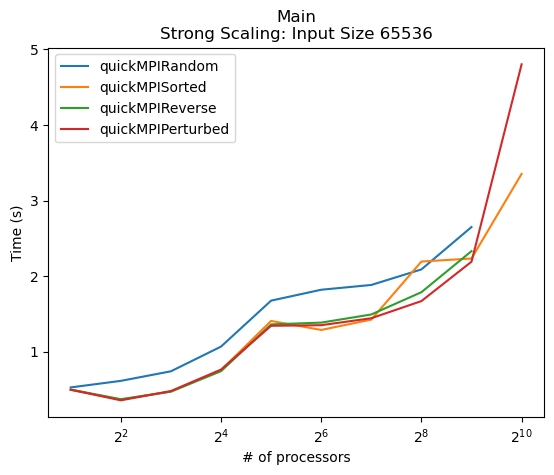

<Figure size 640x480 with 0 Axes>

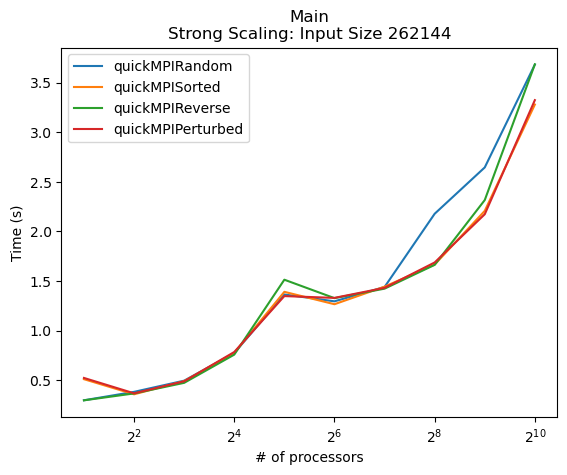

<Figure size 640x480 with 0 Axes>

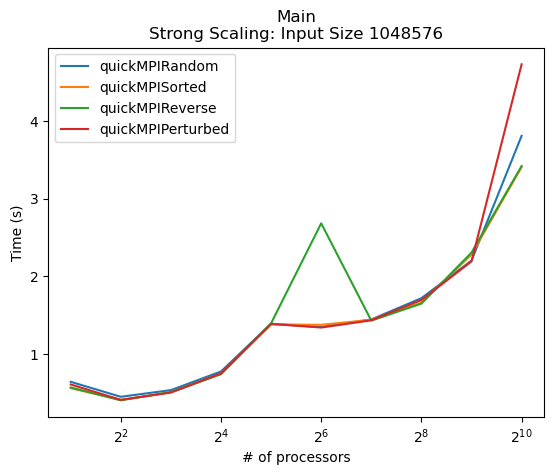

<Figure size 640x480 with 0 Axes>

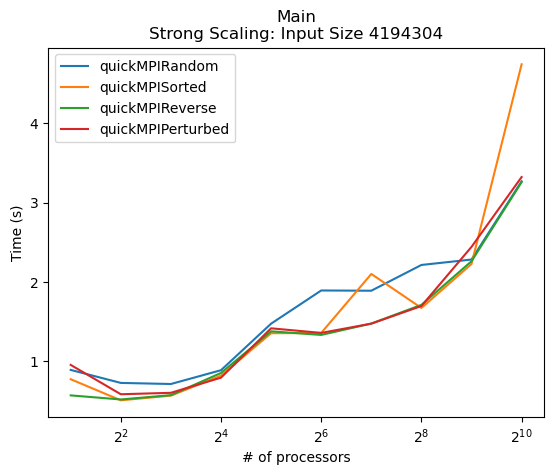

<Figure size 640x480 with 0 Axes>

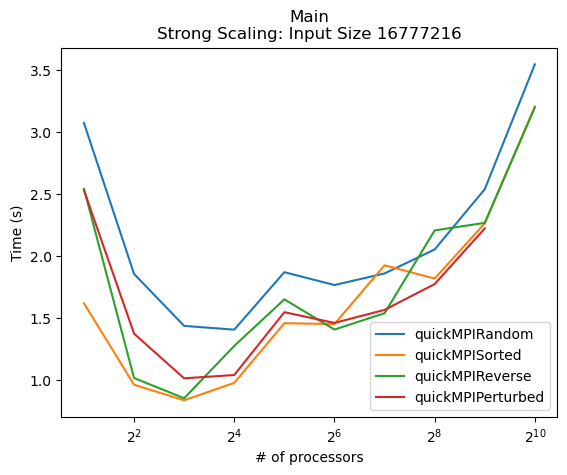

<Figure size 640x480 with 0 Axes>

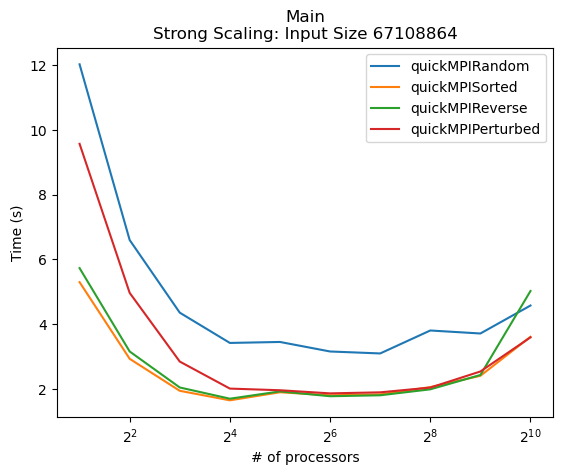

<Figure size 640x480 with 0 Axes>

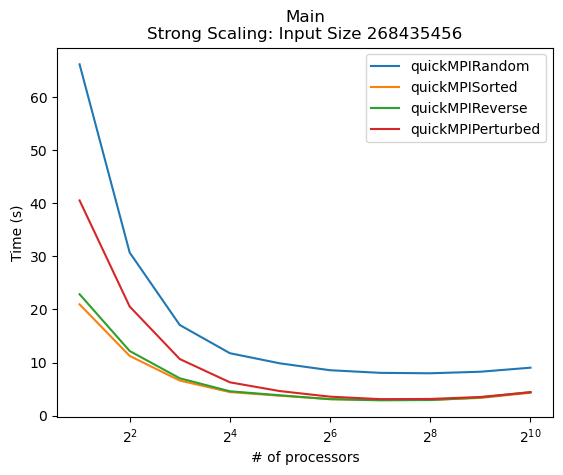

<Figure size 640x480 with 0 Axes>

In [128]:
values = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]

for val in values:
    plot_strong_scaling(algosMain, val, 'Avg time/rank', 'Main\nStrong Scaling: Input Size ' + str(val), '# of processors', 'Time (s)', name_prefix='main_')
    # plot_strong_scaling(algosComm, val, 'Avg time/rank', 'Comm\nStrong Scaling: Input Size ' + str(val), '# of processors', 'Time (s)')
    # plot_strong_scaling(algosComp, val, 'Avg time/rank', 'Comp_Large\nStrong Scaling: Input Size ' + str(val), '# of processors', 'Time (s)')

CUDA

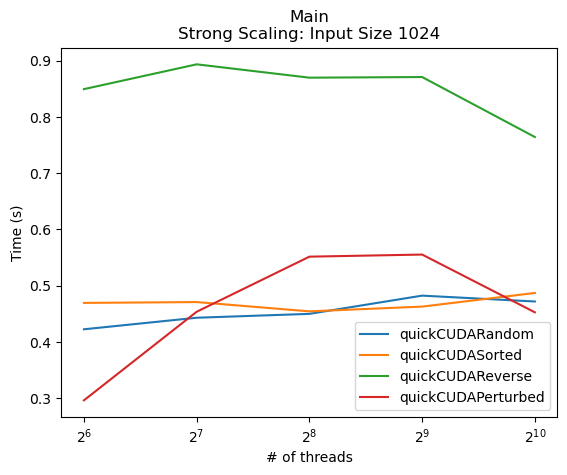

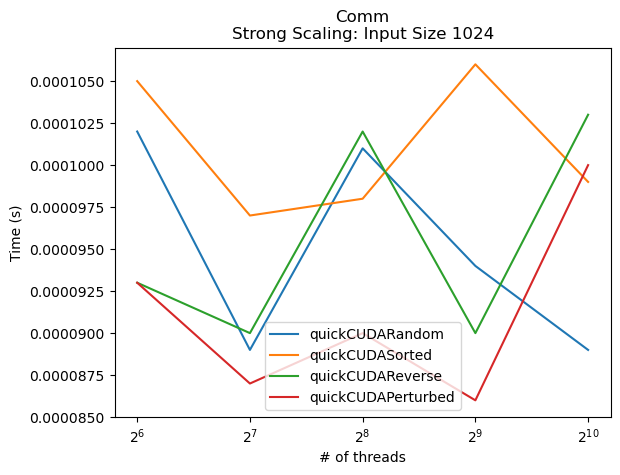

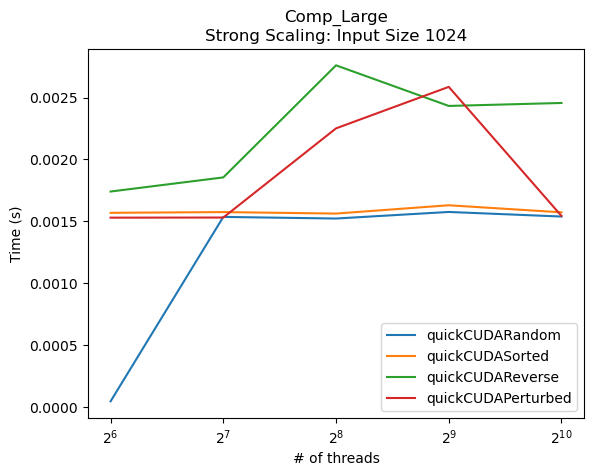

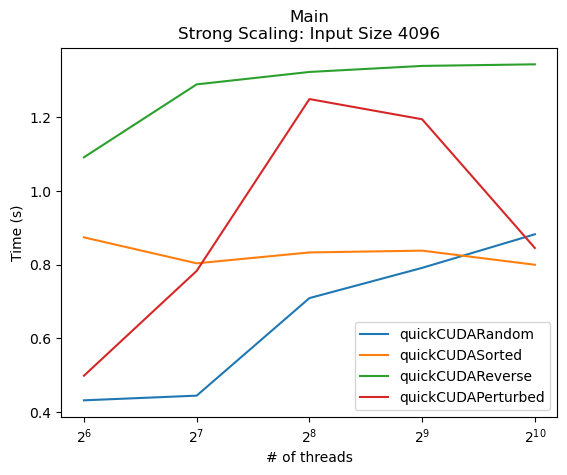

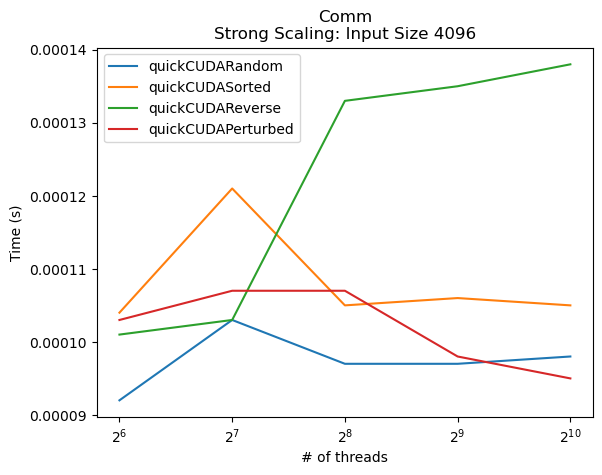

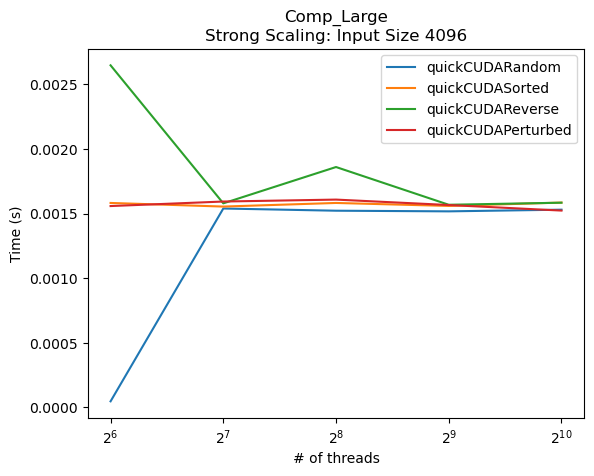

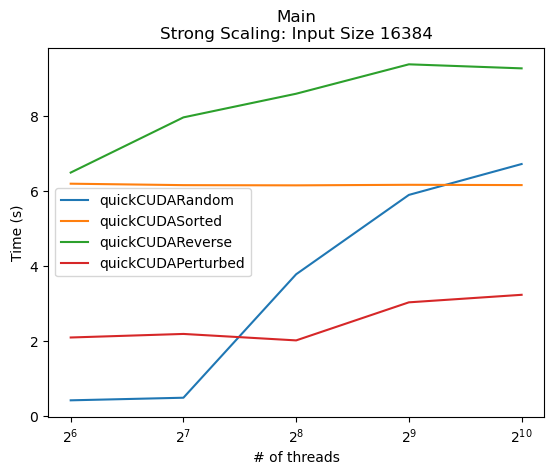

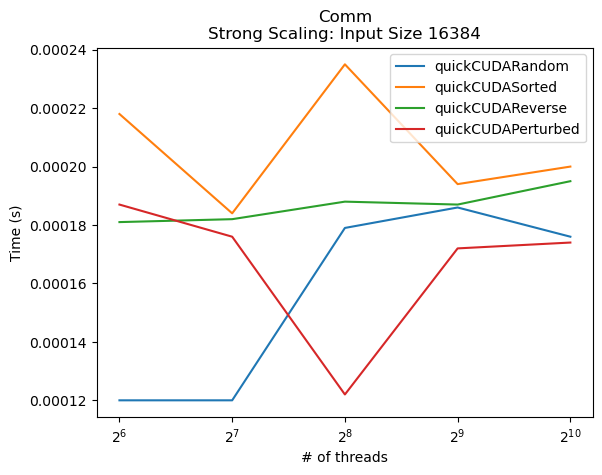

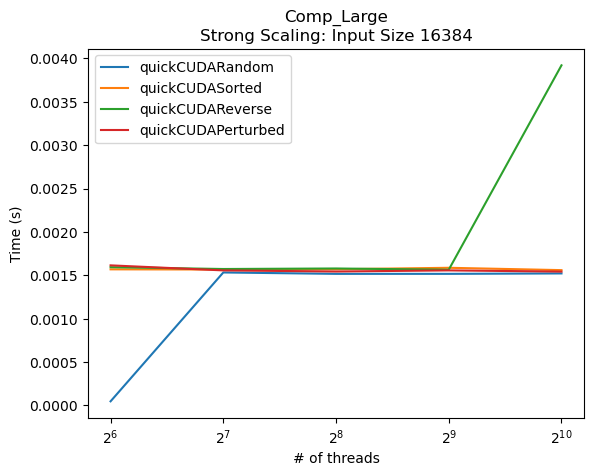

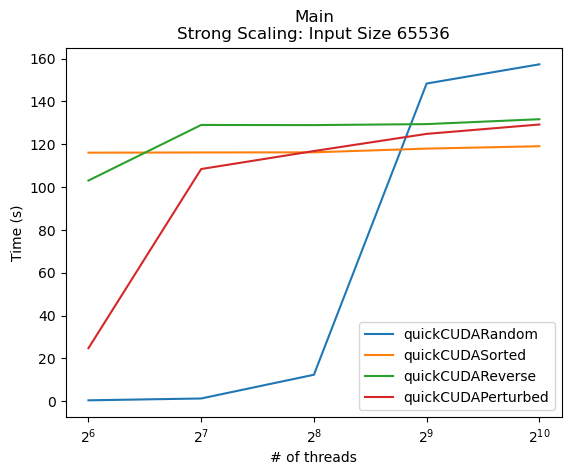

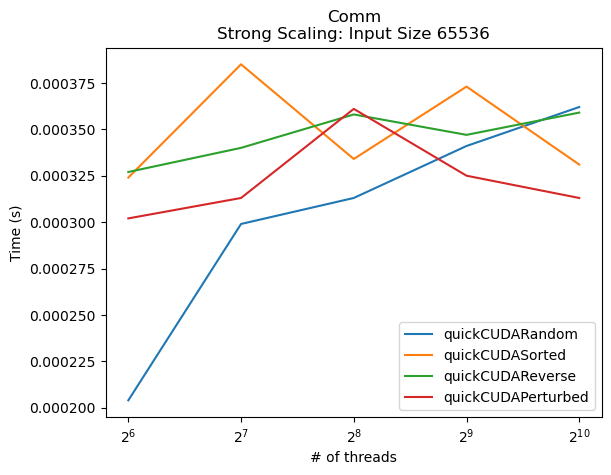

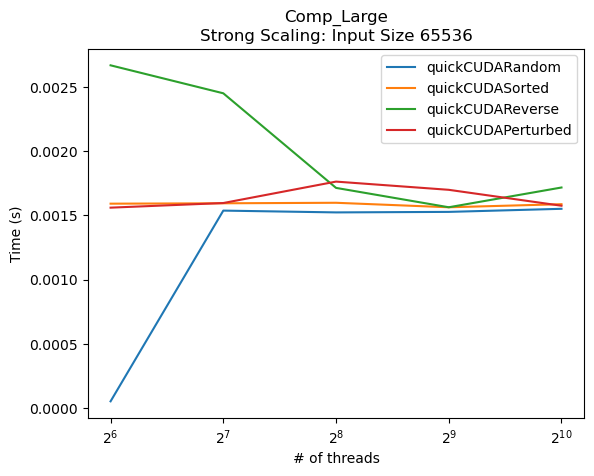

In [97]:
def plot_strong_scaling(algos, num_vals, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    for k in algos.keys():
        dframe = algos[k]
        xvals = dframe['num_threads']
        yvals = dframe[num_vals][time_type]
        ax.plot(xvals, yvals, label=k)
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

values = [2**10, 2**12, 2**14, 2**16]
for val in values:
    plot_strong_scaling(algosMainCUDA, val, 'Avg time/rank', 'Main\nStrong Scaling: Input Size ' + str(val), '# of threads', 'Time (s)')
    plot_strong_scaling(algosCommCUDA, val, 'Avg time/rank', 'Comm\nStrong Scaling: Input Size ' + str(val), '# of threads', 'Time (s)')
    plot_strong_scaling(algosCompCUDA, val, 'Avg time/rank', 'Comp_Large\nStrong Scaling: Input Size ' + str(val), '# of threads', 'Time (s)')

Plot strong scaling speedup

In [50]:
def plot_strong_scaling_speedup(algoname, algo, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    xvals = algo['num_procs']
    
    for val in values:
        vals_list = list(algo[val][time_type])
        yvals = [vals_list[0] / currVal for currVal in vals_list]
        ax.plot(xvals, yvals, label=str(val))
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

MPI

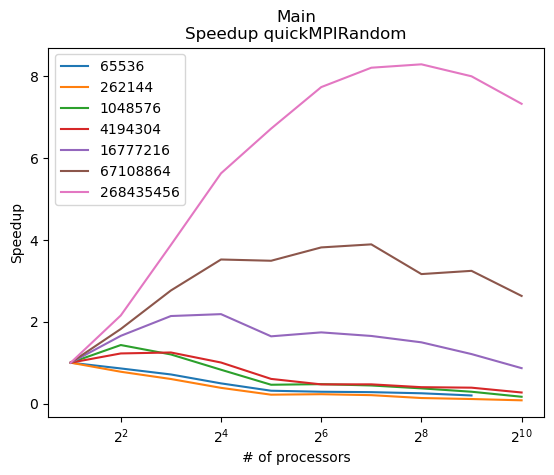

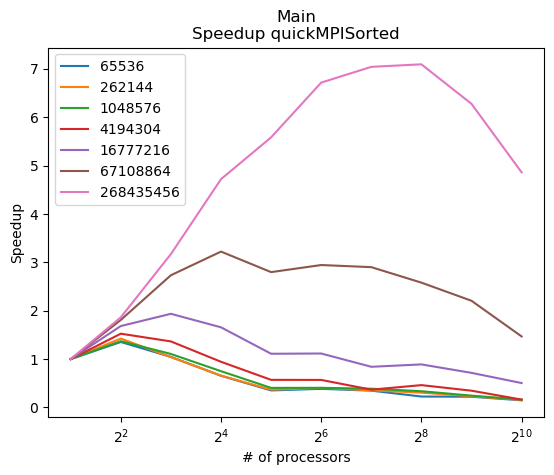

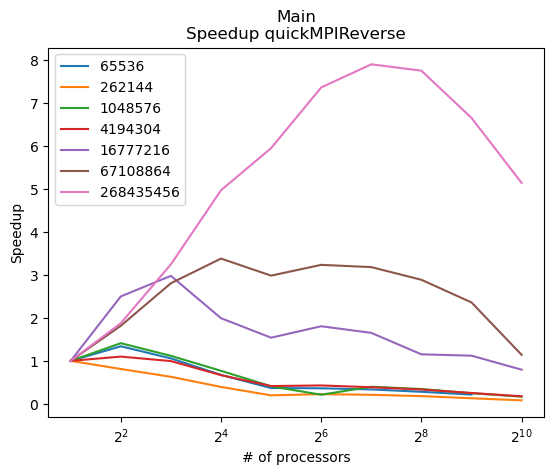

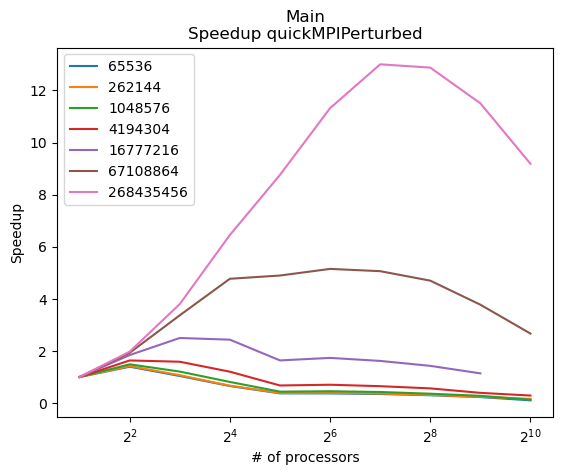

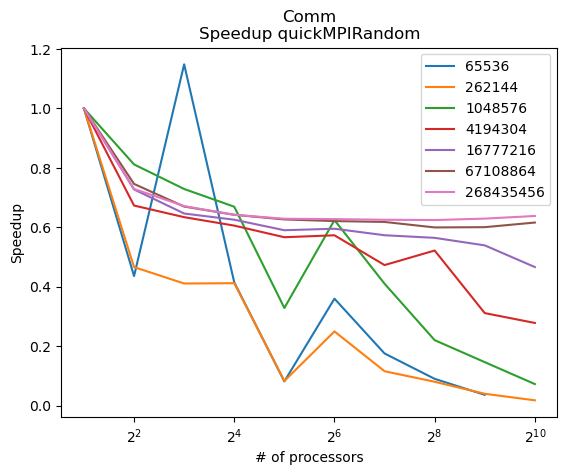

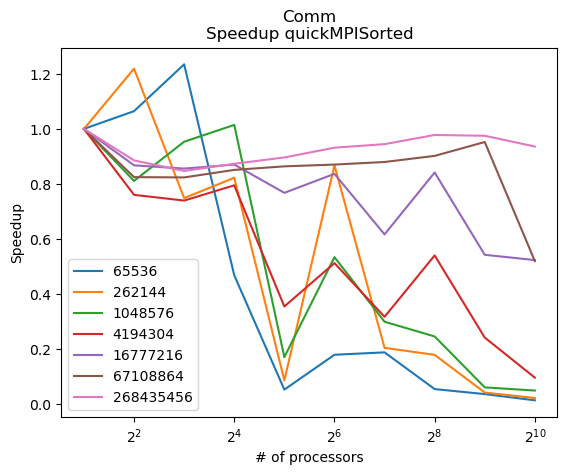

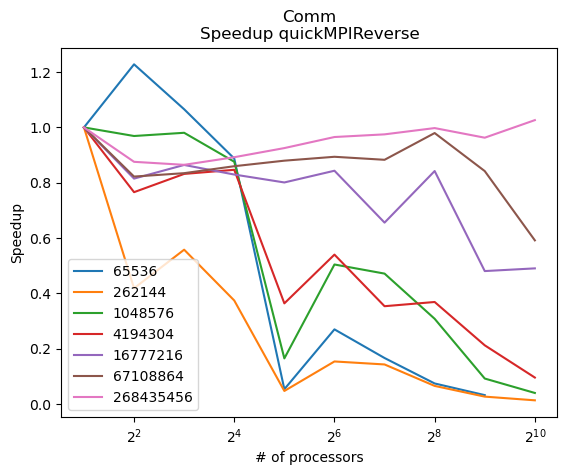

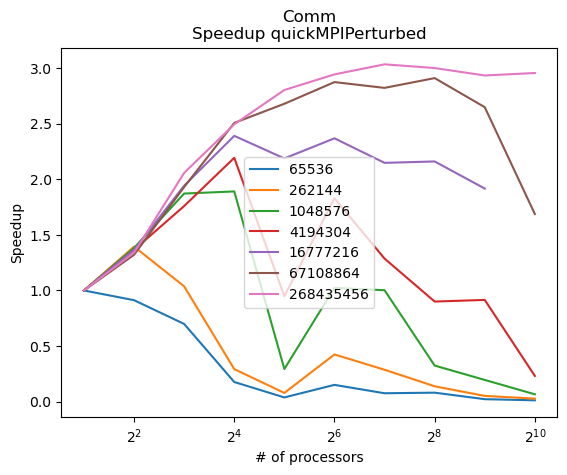

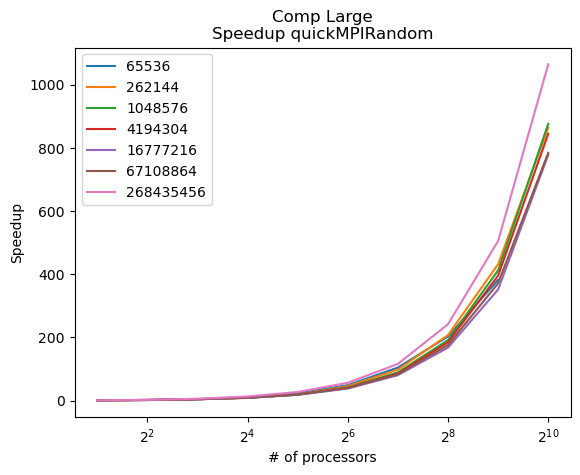

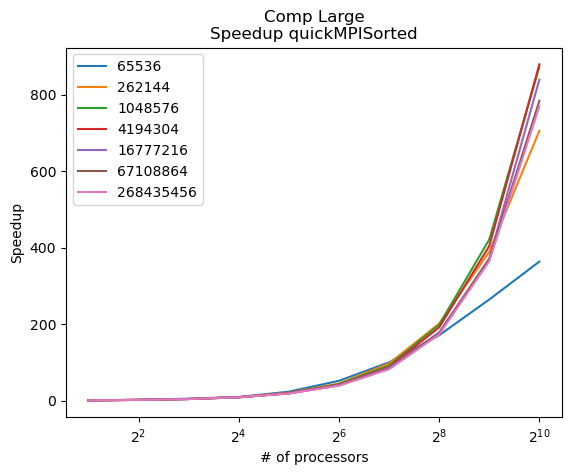

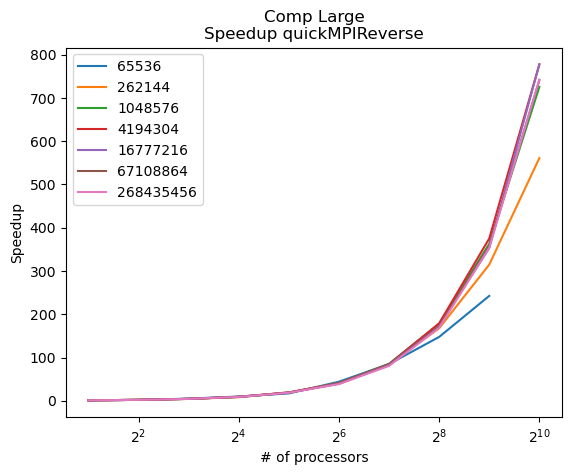

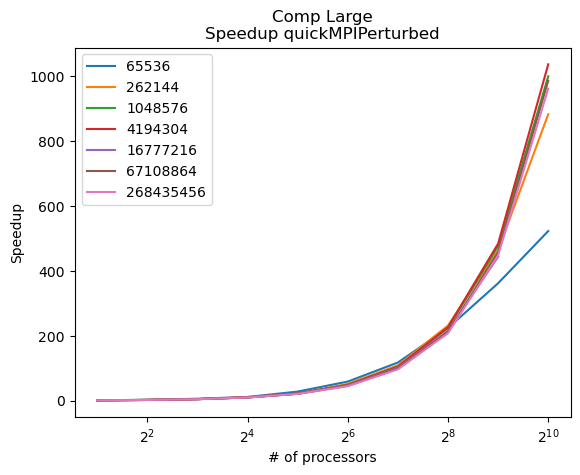

In [54]:
values = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]
for key in algosMain.keys():
    plot_strong_scaling_speedup(key, algosMain[key], values, 'Avg time/rank', 'Main\nSpeedup ' + key, '# of processors', 'Speedup')
    
for key in algosComm.keys():
    plot_strong_scaling_speedup(key, algosComm[key], values, 'Avg time/rank', 'Comm\nSpeedup ' + key, '# of processors', 'Speedup')
    
for key in algosComp.keys():
    plot_strong_scaling_speedup(key, algosComp[key], values, 'Avg time/rank', 'Comp Large\nSpeedup ' + key, '# of processors', 'Speedup')

CUDA

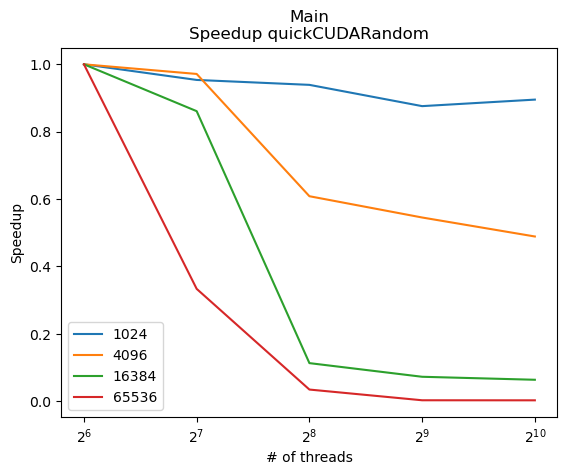

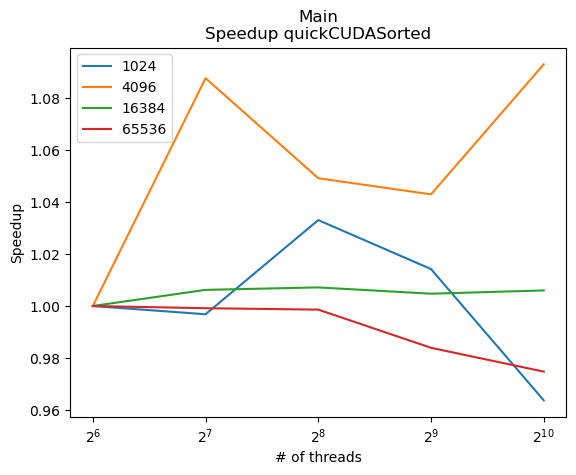

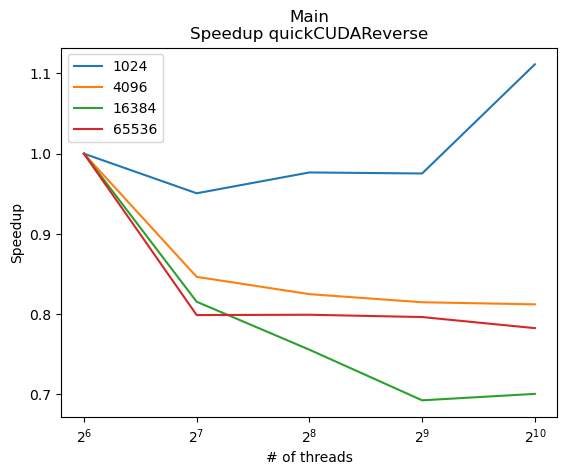

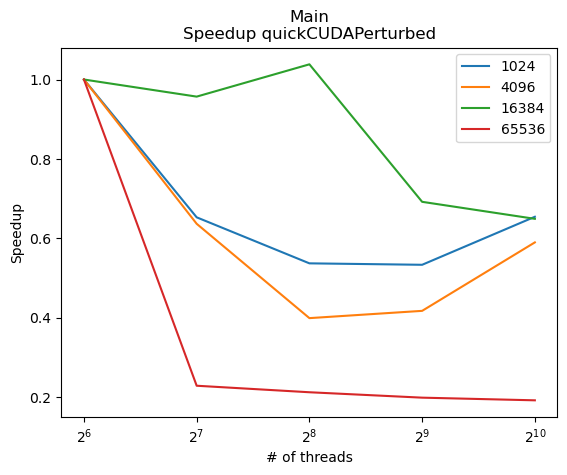

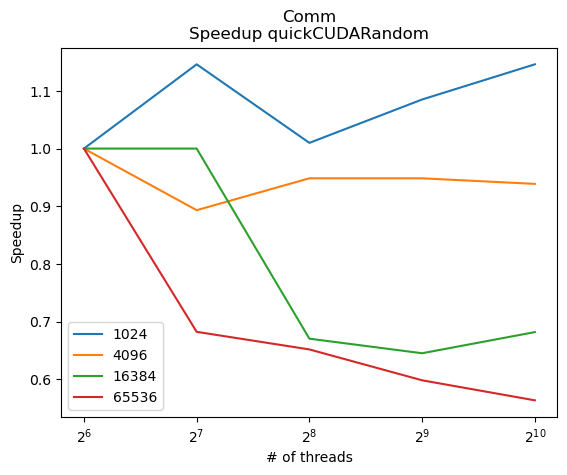

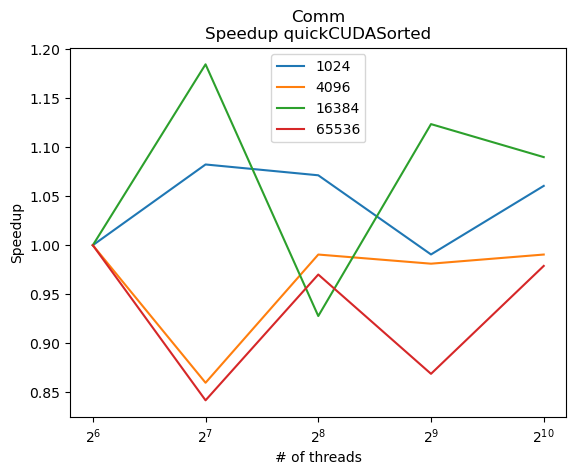

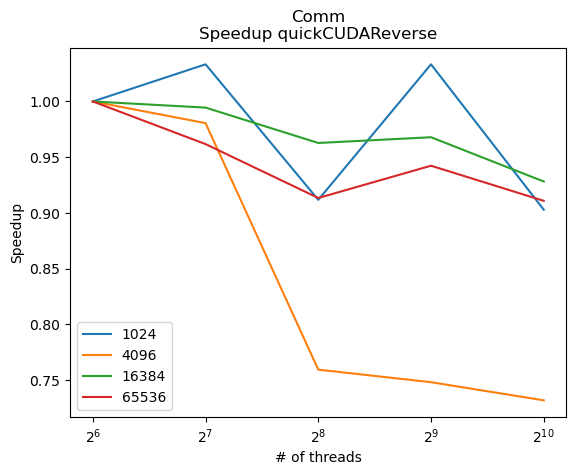

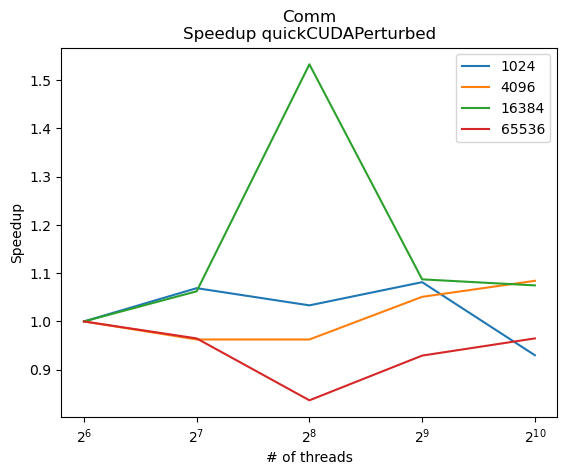

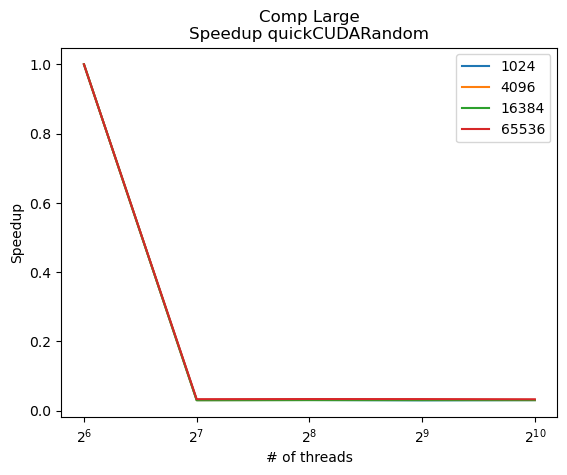

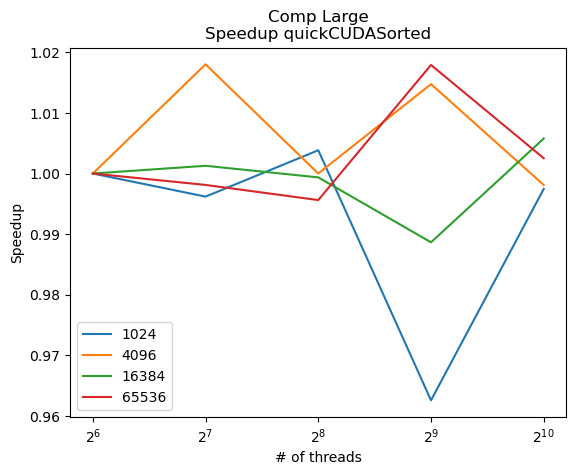

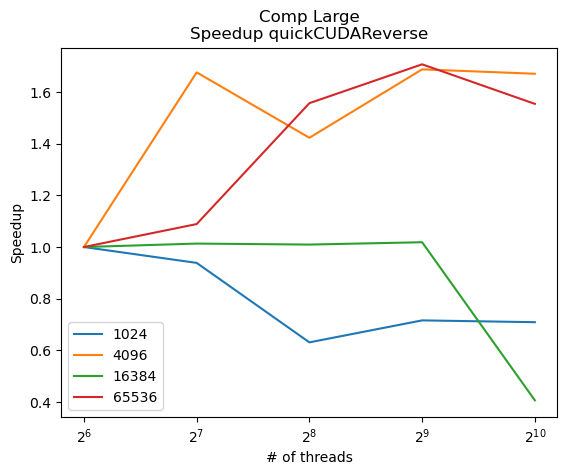

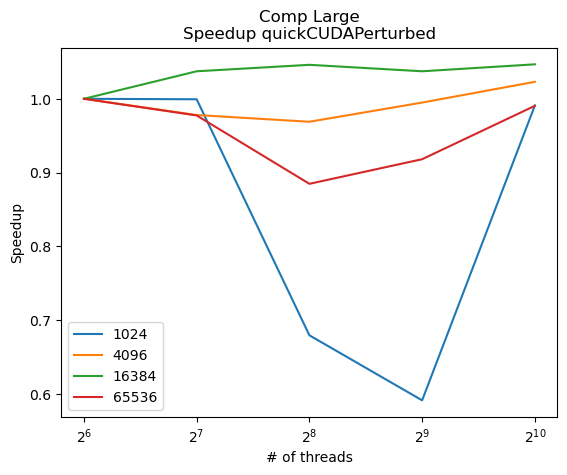

In [98]:
def plot_strong_scaling_speedup(algoname, algo, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    xvals = algo['num_threads']
    
    for val in values:
        vals_list = list(algo[val][time_type])
        yvals = [vals_list[0] / currVal for currVal in vals_list]
        ax.plot(xvals, yvals, label=str(val))
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

for key in algosMainCUDA.keys():
    plot_strong_scaling_speedup(key, algosMainCUDA[key], values, 'Avg time/rank', 'Main\nSpeedup ' + key, '# of threads', 'Speedup')
    
for key in algosCommCUDA.keys():
    plot_strong_scaling_speedup(key, algosCommCUDA[key], values, 'Avg time/rank', 'Comm\nSpeedup ' + key, '# of threads', 'Speedup')
    
for key in algosCompCUDA.keys():
    plot_strong_scaling_speedup(key, algosCompCUDA[key], values, 'Avg time/rank', 'Comp Large\nSpeedup ' + key, '# of threads', 'Speedup')

Plot weak scaling

In [105]:
def plot_weak_scaling(algoname, algo, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    xvals = [2, 8, 32, 128, 512]
    sizePerXVal = [2**20, 2**22, 2**24, 2**26, 2**28]
    yvals = []
    for idx, val in enumerate(sizePerXVal):
        correctNumProcs = algo.loc[algo['num_procs'] == xvals[idx]]
        times = correctNumProcs[val][time_type]
        yvals.append(float(times.iloc[0]))
    
    ax.plot(xvals, yvals, label = algoname)
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

def plot_weak_scaling_CUDA(algoname, algo, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1,1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    xvals = [128, 256, 512, 1024]
    sizePerXVal = [2**10, 2**12, 2**14, 2**16]
    yvals = []
    for idx, val in enumerate(sizePerXVal):
        correctNumProcs = algo.loc[algo['num_threads'] == xvals[idx]]
        times = correctNumProcs[val][time_type]
        yvals.append(float(times.iloc[0]))
    
    ax.plot(xvals, yvals, label = algoname)
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

MPI

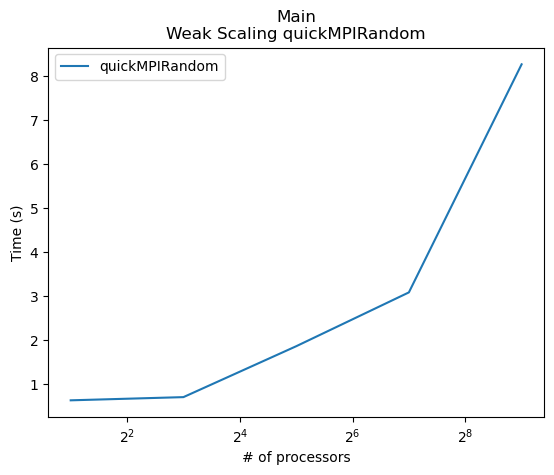

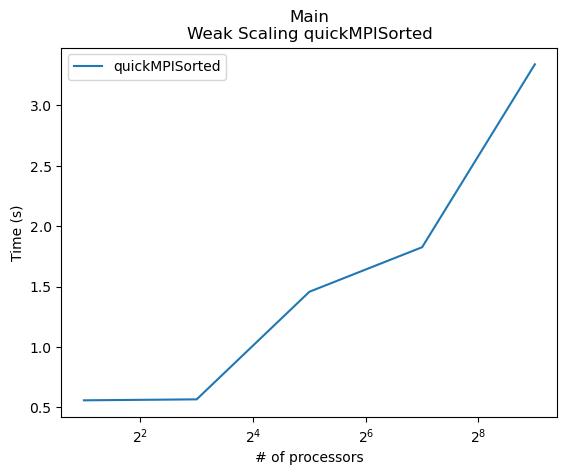

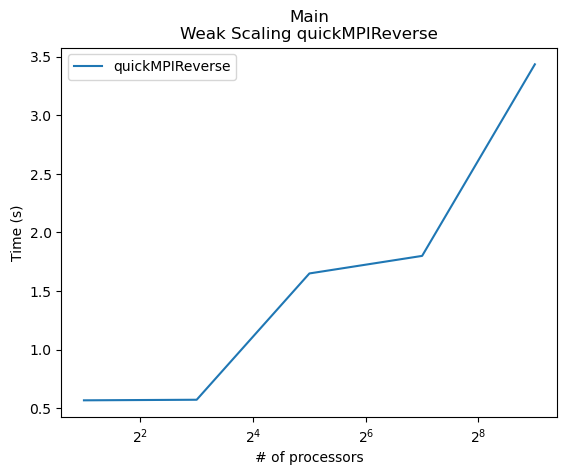

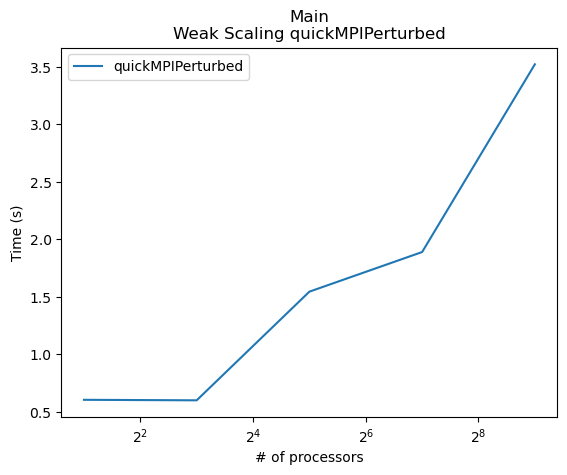

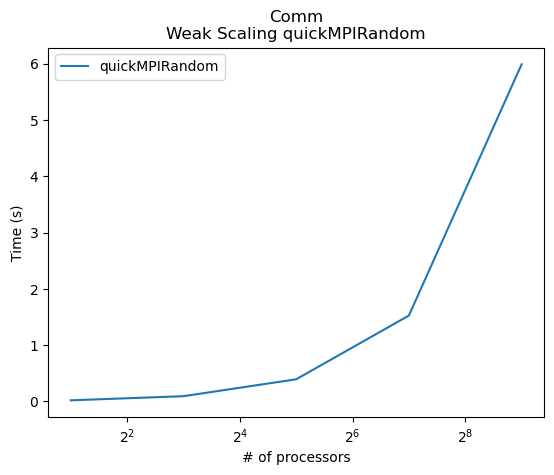

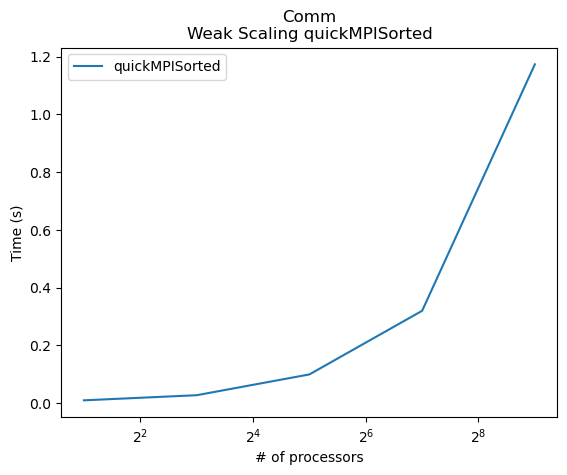

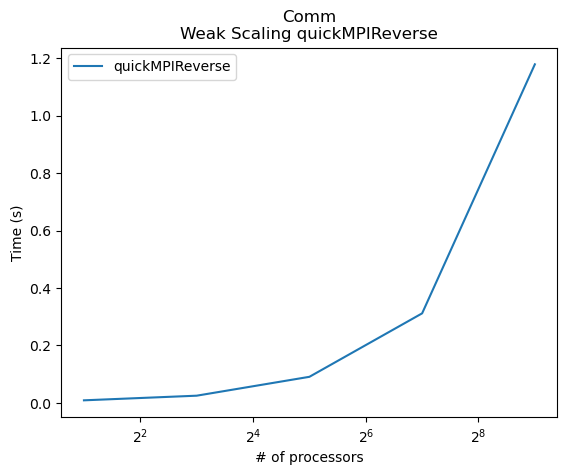

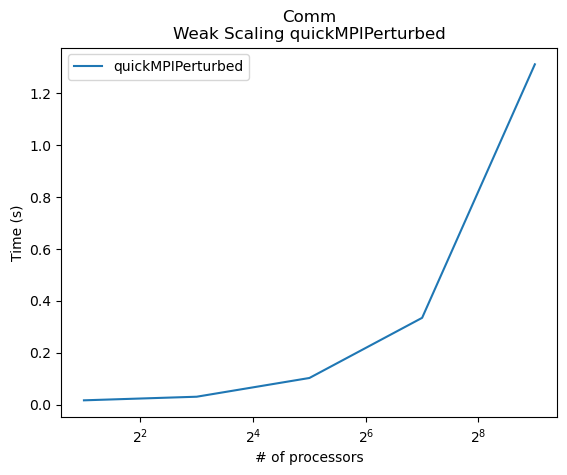

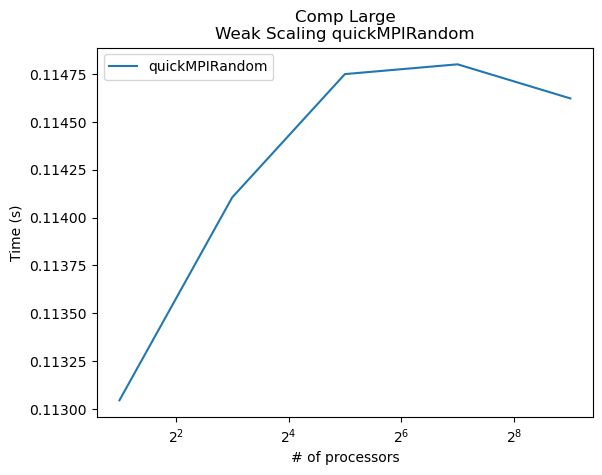

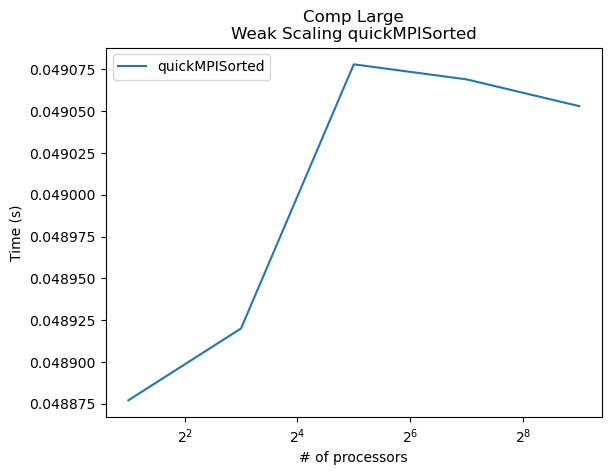

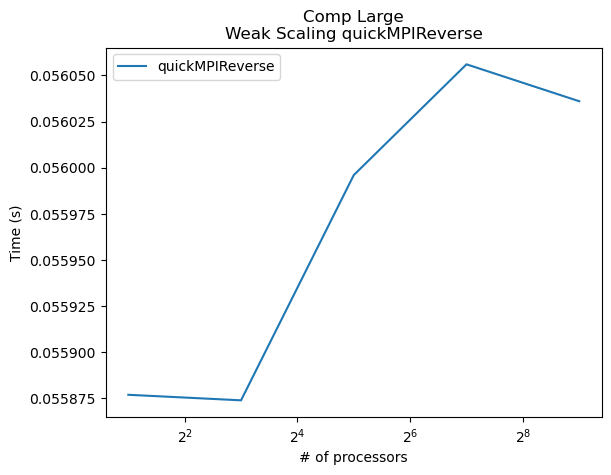

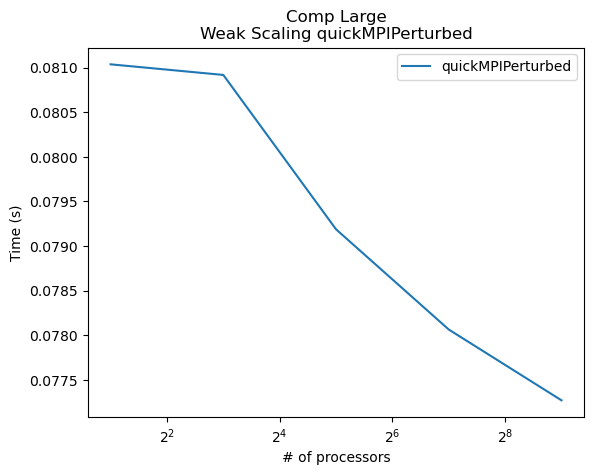

In [131]:
for key in algosMain.keys():
    plot_weak_scaling(key, algosMain[key], values, 'Avg time/rank', 'Main\nWeak Scaling ' + key, '# of processors', 'Time (s)')

for key in algosComm.keys():
    plot_weak_scaling(key, algosComm[key], values, 'Avg time/rank', 'Comm\nWeak Scaling ' + key, '# of processors', 'Time (s)')

for key in algosComp.keys():
    plot_weak_scaling(key, algosComp[key], values, 'Avg time/rank', 'Comp Large\nWeak Scaling ' + key, '# of processors', 'Time (s)')

CUDA

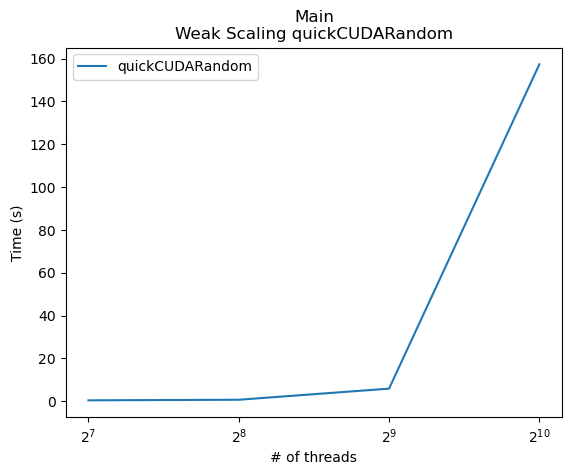

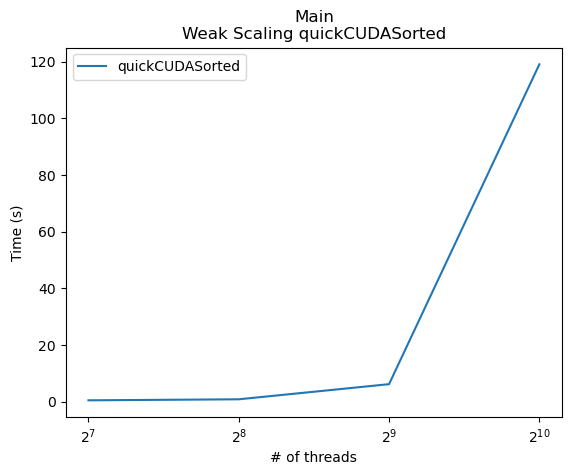

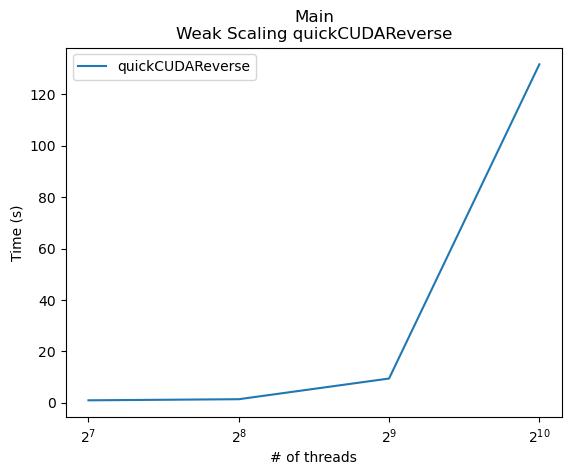

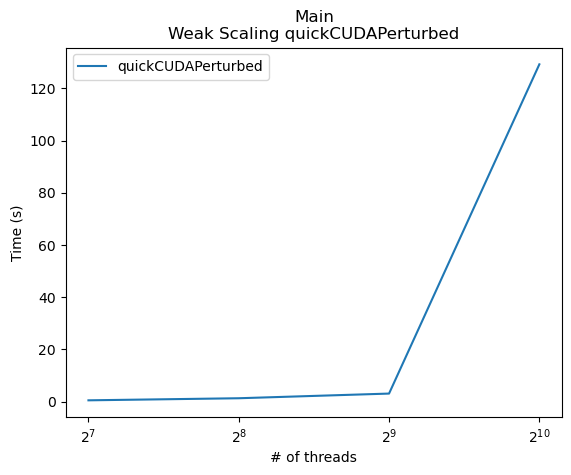

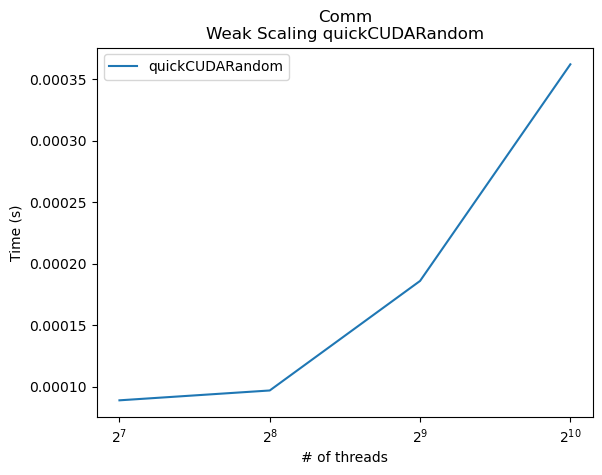

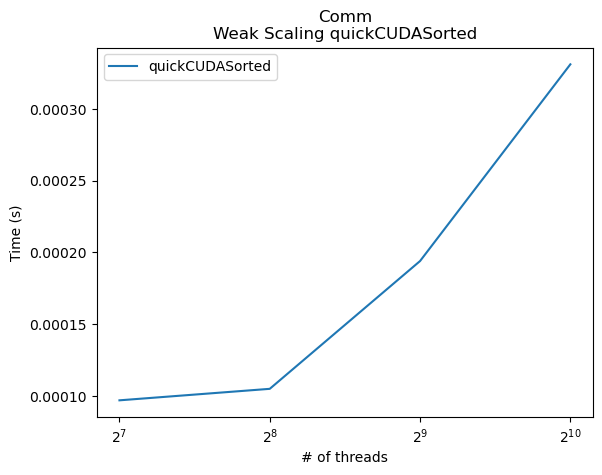

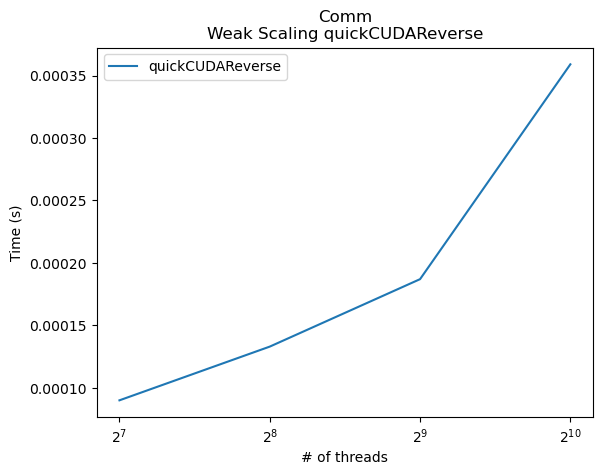

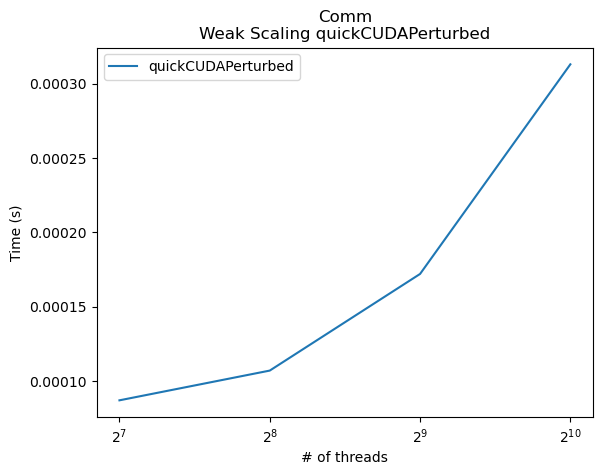

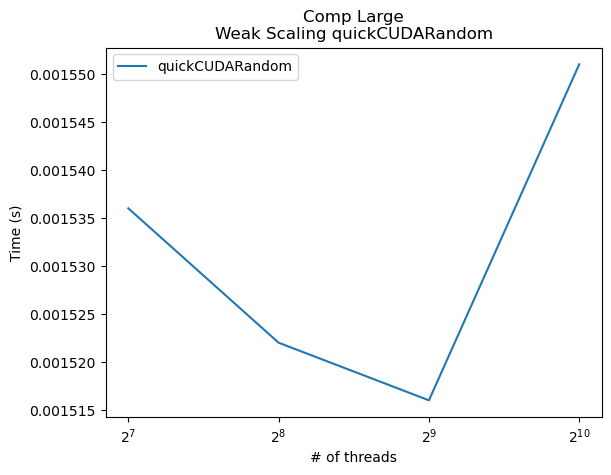

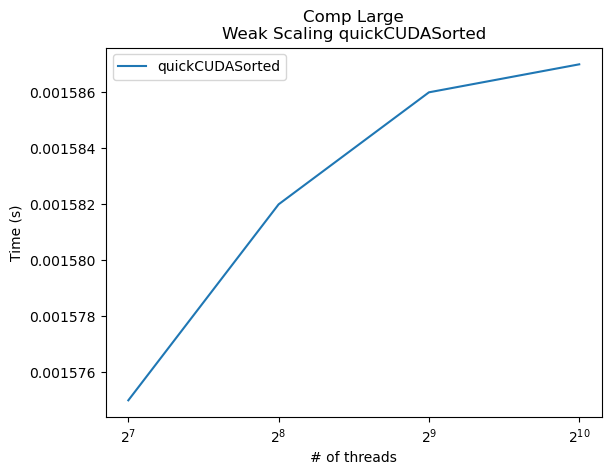

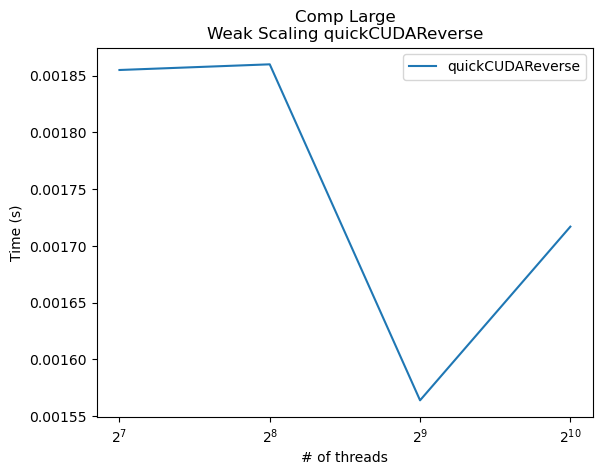

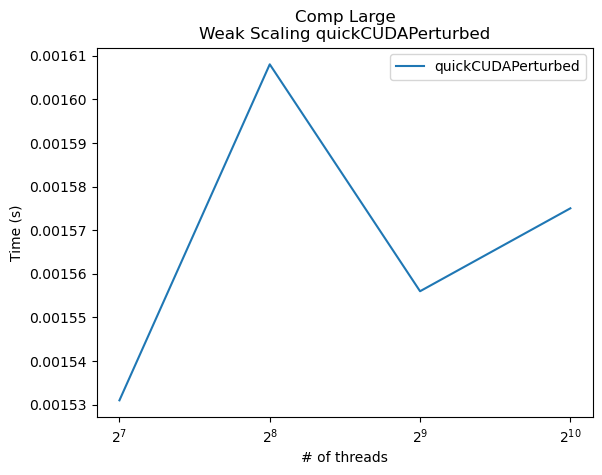

In [106]:
for key in algosMainCUDA.keys():
    plot_weak_scaling_CUDA(key, algosMainCUDA[key], values, 'Avg time/rank', 'Main\nWeak Scaling ' + key, '# of threads', 'Time (s)')

for key in algosCommCUDA.keys():
    plot_weak_scaling_CUDA(key, algosCommCUDA[key], values, 'Avg time/rank', 'Comm\nWeak Scaling ' + key, '# of threads', 'Time (s)')

for key in algosCompCUDA.keys():
    plot_weak_scaling_CUDA(key, algosCompCUDA[key], values, 'Avg time/rank', 'Comp Large\nWeak Scaling ' + key, '# of threads', 'Time (s)')